<Axes: >

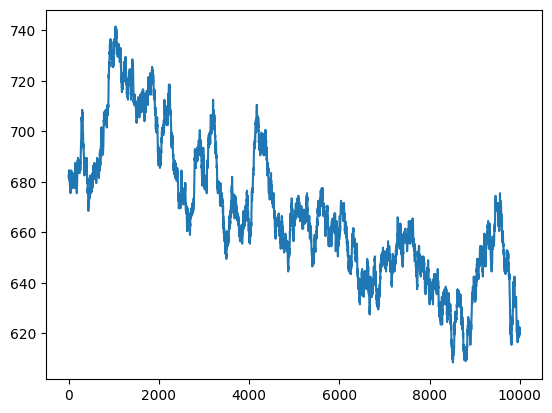

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

day = 2

df = pd.read_csv(f'd{day}.csv', sep=';')
coco = df[df['product'] == 'COCONUT']['mid_price']
coco = coco.reset_index(drop=True)
coup = df[df['product'] == 'COCONUT_COUPON']['mid_price']
coup = coup.reset_index(drop=True)
df = pd.DataFrame({'coco': coco, 'coup': coup})

df['coup'].plot()

In [38]:
import numpy as np
import math
from typing import Union

def norm_cdf(x: float) -> float:
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

def black_scholes(S: float):
    K = 10000
    T = (250-3)/252
    sigma = 0.161615
    # Compute d1 and d2
    d1 = (np.log(S / K) + (0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm_cdf(d1) - K * norm_cdf(d2)
    return call_price

# Example usage
S = 10000  # Current stock price  # Volatility
print(black_scholes(S))
option_price = df['coup']
option_price = option_price.reset_index(drop=True)

product_price = df['coco']
product_price = product_price.reset_index(drop=True)

lis = []
for i in range(len(option_price)):
    lis.append(black_scholes(product_price[i]))

df['op'] = lis

mean = (df['op'] - df['coup']).mean()
std = (df['op'] - df['coup']).std()

print(mean, std)

# (df['op'] - df['coup'] - mean).plot()
# plt.axhline(std, color='r')
# plt.axhline(-std, color='r')


637.641930109763
5.731994862890836 14.706621008637184


<Axes: >

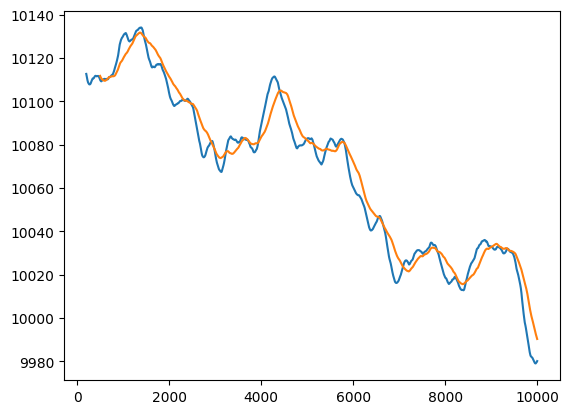

In [39]:
df['coco'].rolling(200).mean().plot()
df['coco'].rolling(500).mean().plot()

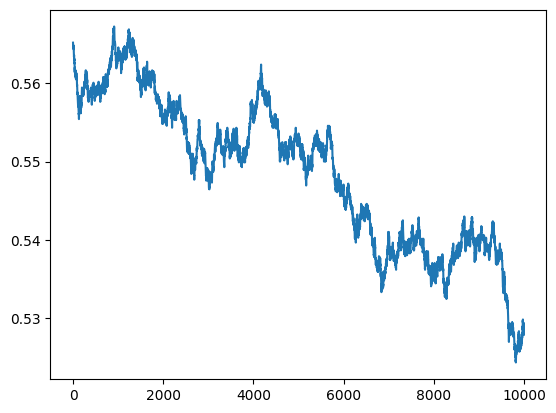

In [40]:
def calculate_delta(S):
    """
    Calculate the delta of a call option.

    Parameters:
    S (float): Current stock price
    K (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate (annual)
    sigma (float): Volatility of the underlying asset (annual)

    Returns:
    float: Delta of the call option
    """
    K = 10000
    T = (250-day)/252
    sigma = 0.16096 
    # Calculate d1
    d1 = (np.log(S / K) + (0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    # Calculate delta using the CDF of the standard normal distribution
    delta = norm_cdf(d1)
    
    return delta

lis = []
for i in range(len(option_price)):
    lis.append(calculate_delta(product_price[i]))

plt.plot(lis)